In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_curve

In [3]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.drop('User ID' ,axis=1,inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   EstimatedSalary  400 non-null    int64 
 3   Purchased        400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [8]:
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'])

In [9]:
df.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


In [10]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

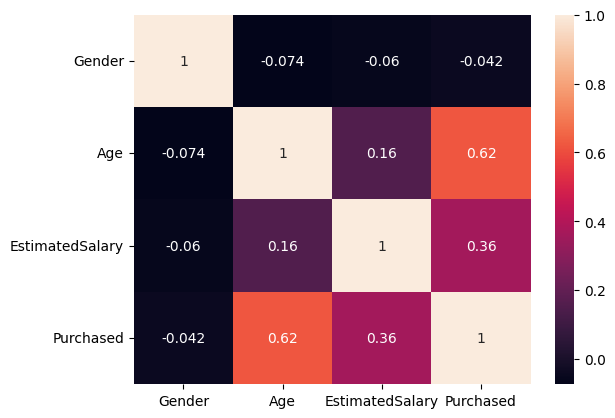

In [11]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
df.drop('Gender',axis=1,inplace=True)

In [13]:
x=df.drop('Purchased',axis=1)
y=df['Purchased']
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [14]:
model=GaussianNB()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
print(accuracy_score(ypred,ytest))
print(classification_report(ypred,ytest))

0.9125
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        48
           1       0.88      0.91      0.89        32

    accuracy                           0.91        80
   macro avg       0.91      0.91      0.91        80
weighted avg       0.91      0.91      0.91        80



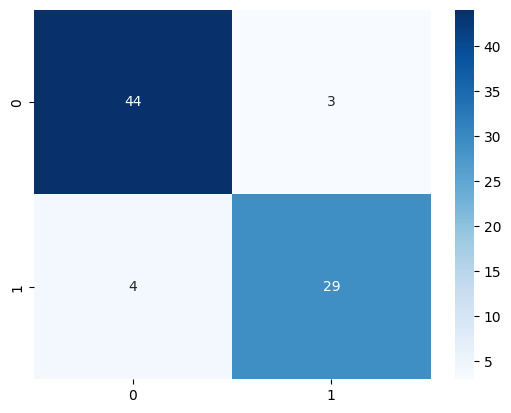

In [16]:
cm=confusion_matrix(ytest,ypred)
sns.heatmap(cm,cmap='Blues',annot=True)
plt.show()

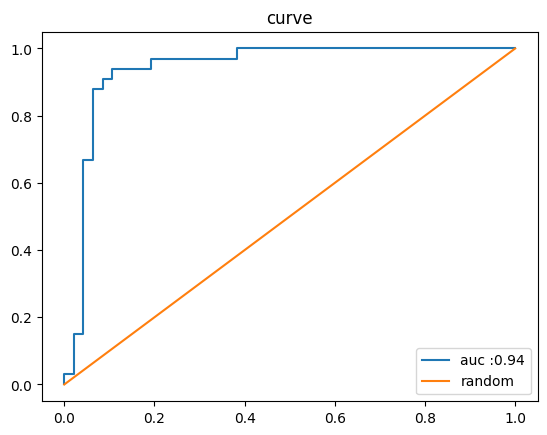

In [17]:
ypredproba=model.predict_proba(xtest)[:,1]
fpr,tpr,_=roc_curve(ytest,ypredproba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr,tpr,label=f'auc :{roc_auc:.2f}')
plt.plot([0,1],[0,1],label='random')
plt.title('curve')
plt.legend()
plt.show()

In [19]:
new_inp={'Age':'19','EstimatedSalary':'19000'}
x_new=pd.DataFrame([new_inp])
y_new_pred=model.predict(x_new)
print(y_new_pred)

[0]
